# 한글 폰트 설치

In [8]:
# 한글폰트 설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

패키지 목록을 읽는 중입니다... 완료%
의존성 트리를 만드는 중입니다       
상태 정보를 읽는 중입니다... 완료
다음 *새로운* 패키지들을 설치:
  fonts-nanum
0개 업그레이드, 1개 새로 설치, 0개 제거, 214개 업그레이드 안 함.
아카이브 9,599 kB를 받아야 합니다.
이 작업 후 디스크 공간을 29.6 MB만큼 더 사용하게 됩니다.
받기:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fonts-nanum all 20180306-3 [9,599 kB]
2초에 9,599 kB 받음 (4,072 kB/s)             
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
Selecting previously unselected package fonts-nanum.
(데이터베이스 읽는중 ... 현재 28340개의 파일과 디렉터리가 설치되어 있습니다.)
Preparing to unpack .../fonts-nanum_20180306-3_all.deb ...
Unpacking fonts-nanum (20180306-3) ...
fonts-nanum (20180306-3) 설정하는 중입니다 ...
sudo: fc-cache: 명령이 없습니다


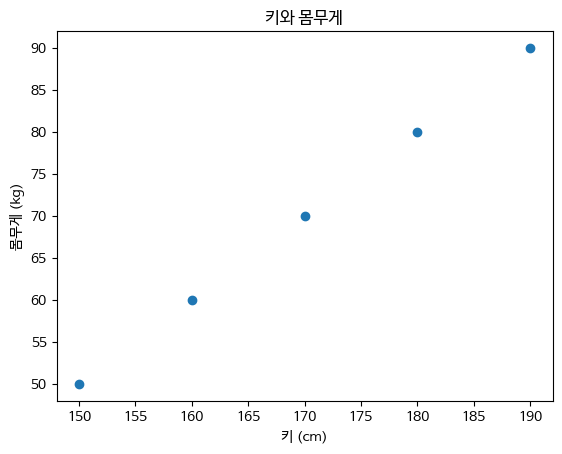

In [9]:
# 한글 표시 여부 확인
import matplotlib.pyplot as plt
plt.rcParams['font.family'] = 'NanumBarunGothic' # 나눔바른고딕 적용하기

# 예제 데이터
heights = [150, 160, 170, 180, 190]  # 키 (cm)
weights = [50, 60, 70, 80, 90]       # 몸무게 (kg)

# 산점도 그리기
plt.scatter(heights, weights)

# 제목 및 레이블 추가
plt.title("키와 몸무게")
plt.xlabel("키 (cm)")
plt.ylabel("몸무게 (kg)")

# 그래프 표시
plt.show()

# 외부에서 데이터 다운로드 및 확인

In [10]:
!git clone git@github.com:songys/Chatbot_data.git

'Chatbot_data'에 복제합니다...
remote: Enumerating objects: 69, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (17/17), done.
remote: Total 69 (delta 18), reused 4 (delta 4), pack-reused 48
오브젝트를 받는 중: 100% (69/69), 398.65 KiB | 889.00 KiB/s, 완료.
델타를 알아내는 중: 100% (35/35), 완료.


# 데이터 정제 함수 선언

In [11]:
import re

def preprocess_sentence(sentence):
    sentence = sentence.lower() # 소문자 변환
    sentence = re.sub(r'[" "]+', " ", sentence) # 공백 제거
    sentence = re.sub(r"[^ㄱ-ㅎ가-힣a-zA-Z?.!,]+", " ", sentence) # 글자 및 구두점 외 특수문자 제거
    sentence = sentence.strip()

    return sentence

# 데이터 로드 및 토큰화

In [ ]:
# 파일 읽기
file_path = "" # 파일 경로 입력

with open(file_path, "r", encoding="utf-8") as loaded_file:
    loaded_lines = loaded_file.readlines()

preprocessed_corpus = [preprocess_sentence(line, s_token=True, e_token=True) for line in loaded_lines] # 시작/종료 토큰 사용 전처리

In [ ]:
# 한국어 관련 라이브러리: 설치 후 런타임 다시 시작 필요
!git clone https://github.com/SOMJANG/Mecab-ko-for-Google-Colab.git
!bash ./Mecab-ko-for-Google-Colab/install_mecab-ko_on_colab_light_220429.sh

'Mecab-ko-for-Google-Colab'에 복제합니다...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (47/47), done.
remote: Compressing objects: 100% (38/38), done.
remote: Total 138 (delta 26), reused 22 (delta 8), pack-reused 91
오브젝트를 받는 중: 100% (138/138), 1.72 MiB | 21.42 MiB/s, 완료.
델타를 알아내는 중: 100% (65/65), 완료.
./Mecab-ko-for-Google-Colab/install_mecab-ko_on_colab_light_220429.sh: 4 줄: cd: /content: 그런 파일이나 디렉터리가 없습니다
Installing konlpy.....
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.4/19.4 MB 26.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 465.6/465.6 kB 18.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.0/8.0 MB 36.4 MB/s eta 0:00:0000:0100:01
Done
Installing mecab-0.996-ko-0.9.2.tar.gz.....
from https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
--2023-11-29 11:51:12--  https://bitbucket.org/eunjeon/mecab-ko/downloads/mecab-0.996-ko-0.9.2.tar.gz
bitbucket.org (bitbucket.org)을(를) 해석하는 중... 104.192

In [7]:
# 한국어 포함된 코퍼스 토큰화
import MeCab

# MeCab 초기화
mecab = MeCab.morphs()

AttributeError: module 'MeCab' has no attribute 'morphs'

In [ ]:
# 한국어 토큰화
kor_corpus = [mecab.morphs(sentence) for sentence in preprocessed_corpus]

# 어휘 대체(Lexical Substitution)을 통한 데이터 증강

In [ ]:
!git clone git@github.com:Kyubyong/wordvectors.git # ko.bin 파일 사용

# 데이터 벡터화

In [ ]:
# 아래와 같이 코퍼스 전체에 시작 및 종료 토큰 추가
sample_data = ["12", "시", "땡", "!"]

print(["<start>"] + sample_data + ["<end>"])

특수 토큰을 더함으로써 ans_corpus 또한 완성이 되었으니, que_corpus 와 결합하여 전체 데이터에 대한 단어 사전을 구축하고 벡터화하여 enc_train 과 dec_train 을 얻으세요!

# 훈련

## 예문
1. 지루하다, 놀러가고 싶어.
2. 오늘 일찍 일어났더니 피곤하다.
3. 간만에 여자친구랑 데이트 하기로 했어.
4. 집에 있는다는 소리야.

---

## 제출

Translations
> 1. 잠깐 쉬 어도 돼요 . <end>
> 2. 맛난 거 드세요 . <end>
> 3. 떨리 겠 죠 . <end>
> 4. 좋 아 하 면 그럴 수 있 어요 . <end>

Hyperparameters
> n_layers: 1
> d_model: 368
> n_heads: 8
> d_ff: 1024
> dropout: 0.2

Training Parameters
> Warmup Steps: 1000
> Batch Size: 64
> Epoch At: 10

# 성능 측정

- BLEU Score를 계산하는 calculate_bleu() 함수도 적용